In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

from datetime import datetime


In [33]:
## convert chats into dataframe

f=open("WhatsApp Chat - OG's/_chat.txt",'r',encoding='utf-8')
data=f.read()
print(data)

[27/09/22, 9:27:21 AM] OG'S: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[27/09/22, 9:27:21 AM] Sourabh: ‎Sourabh was added
[27/09/22, 8:46:27 AM] Sourabh: Attendance ke samay call kardena
[27/09/22, 8:46:29 AM] Sourabh: Plz
[27/09/22, 9:27:21 AM] Akash: ‎Akash was added
[27/09/22, 8:48:01 AM] Akash: Are hn ye to naam bulati h
[27/09/22, 8:48:04 AM] Akash: 🤧
[27/09/22, 9:27:21 AM] Suman : ‎Suman  was added
[27/09/22, 9:02:11 AM] Suman : ‎Waiting for this message. This may take a while.
[27/09/22, 9:02:19 AM] Suman : ‎Waiting for this message. This may take a while.
[27/09/22, 9:02:26 AM] Suman : ‎Waiting for this message. This may take a while.
[27/09/22, 9:27:21 AM] ashita : ‎ashita  was added
[27/09/22, 9:03:24 AM] ashita : 🥲delli m hai abhi
[27/09/22, 9:03:41 AM] Suman : ‎Waiting for this message. This may take a while.
[27/09/22, 9:03:45 AM] Suman : ‎Waiting for this message. This may take a while.
[27/09

In [34]:
pattern = r'\[(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2}:\d{2}\s?[APM]{2})\] (.*?): (.*)'
matches = re.findall(pattern, data)[1:]
matches

[('27/09/22', '9:27:21\u202fAM', 'Sourabh', '\u200eSourabh was added'),
 ('27/09/22',
  '8:46:27\u202fAM',
  'Sourabh',
  'Attendance ke samay call kardena'),
 ('27/09/22', '8:46:29\u202fAM', 'Sourabh', 'Plz'),
 ('27/09/22', '9:27:21\u202fAM', 'Akash', '\u200eAkash was added'),
 ('27/09/22', '8:48:01\u202fAM', 'Akash', 'Are hn ye to naam bulati h'),
 ('27/09/22', '8:48:04\u202fAM', 'Akash', '🤧'),
 ('27/09/22', '9:27:21\u202fAM', 'Suman ', '\u200eSuman  was added'),
 ('27/09/22',
  '9:02:11\u202fAM',
  'Suman ',
  '\u200eWaiting for this message. This may take a while.'),
 ('27/09/22',
  '9:02:19\u202fAM',
  'Suman ',
  '\u200eWaiting for this message. This may take a while.'),
 ('27/09/22',
  '9:02:26\u202fAM',
  'Suman ',
  '\u200eWaiting for this message. This may take a while.'),
 ('27/09/22', '9:27:21\u202fAM', 'ashita ', '\u200eashita  was added'),
 ('27/09/22', '9:03:24\u202fAM', 'ashita ', '🥲delli m hai abhi'),
 ('27/09/22',
  '9:03:41\u202fAM',
  'Suman ',
  '\u200eWaiting for 

In [35]:
# Data Preprocessing
df = pd.DataFrame(matches, columns=['Date', 'Time', 'Sender', 'Message'])
df

Date         Time   Sender  \
0       27/09/22   9:27:21 AM  Sourabh   
1       27/09/22   8:46:27 AM  Sourabh   
2       27/09/22   8:46:29 AM  Sourabh   
3       27/09/22   9:27:21 AM    Akash   
4       27/09/22   8:48:01 AM    Akash   
...          ...          ...      ...   
119338  06/08/24  11:00:20 AM   Suman    
119339  06/08/24  11:00:48 AM   Suman    
119340  06/08/24  11:01:58 AM   Suman    
119341  06/08/24  12:41:10 PM    Akash   
119342  06/08/24  12:41:37 PM   Suman    

                                           Message  
0                               ‎Sourabh was added  
1                 Attendance ke samay call kardena  
2                                              Plz  
3                                 ‎Akash was added  
4                       Are hn ye to naam bulati h  
...                                            ...  
119338               Yahi wala hai product analyst  
119339                              Acha nahi nahi  
119340                         Work exp maang raha  
119341                         Wo scaler ka h alag  
119342  Han andar form mein likha hai work exp hai  

[119343 rows x 4 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119343 entries, 0 to 119342
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Date     119343 non-null  object
 1   Time     119343 non-null  object
 2   Sender   119343 non-null  object
 3   Message  119343 non-null  object
dtypes: object(4)
memory usage: 3.6+ MB


In [37]:
df['DateTime'] = df.apply(lambda row: datetime.strptime(f"{row['Date']} {row['Time']}", '%d/%m/%y %I:%M:%S %p'), axis=1)


In [38]:
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year
df['Hour']=df['DateTime'].dt.hour
df['Minute']=df['DateTime'].dt.minute
# df = df.drop(columns=['Date', 'Time'])


In [39]:
df.head()

Date        Time   Sender                           Message  \
0  27/09/22  9:27:21 AM  Sourabh                ‎Sourabh was added   
1  27/09/22  8:46:27 AM  Sourabh  Attendance ke samay call kardena   
2  27/09/22  8:46:29 AM  Sourabh                               Plz   
3  27/09/22  9:27:21 AM    Akash                  ‎Akash was added   
4  27/09/22  8:48:01 AM    Akash        Are hn ye to naam bulati h   

             DateTime  Day  Month  Year  Hour  Minute  
0 2022-09-27 09:27:21   27      9  2022     9      27  
1 2022-09-27 08:46:27   27      9  2022     8      46  
2 2022-09-27 08:46:29   27      9  2022     8      46  
3 2022-09-27 09:27:21   27      9  2022     9      27  
4 2022-09-27 08:48:01   27      9  2022     8      48

In [83]:
df[df['Message'].str.contains('image omitted')]


Date         Time   Sender         Message            DateTime  \
210     27/09/22  11:11:30 AM  ashita   ‎image omitted 2022-09-27 11:11:30   
214     27/09/22  11:13:10 AM   Suman   ‎image omitted 2022-09-27 11:13:10   
217     27/09/22  11:13:45 AM    Akash  ‎image omitted 2022-09-27 11:13:45   
218     27/09/22  11:14:03 AM    Akash  ‎image omitted 2022-09-27 11:14:03   
219     27/09/22  11:14:35 AM   Suman   ‎image omitted 2022-09-27 11:14:35   
...          ...          ...      ...             ...                 ...   
119107  01/08/24  12:25:32 AM   Suman   ‎image omitted 2024-08-01 00:25:32   
119167  01/08/24   5:49:11 PM  Sourabh  ‎image omitted 2024-08-01 17:49:11   
119225  04/08/24  11:48:56 AM   Suman   ‎image omitted 2024-08-04 11:48:56   
119287  05/08/24   8:27:28 PM   Rohan   ‎image omitted 2024-08-05 20:27:28   
119334  06/08/24   9:42:15 AM   Suman   ‎image omitted 2024-08-06 09:42:15   

        Day  Month  Year  Hour  Minute  
210      27      9  2022    11      11  
214      27      9  2022    11      13  
217      27      9  2022    11      13  
218      27      9  2022    11      14  
219      27      9  2022    11      14  
...     ...    ...   ...   ...     ...  
119107    1      8  2024     0      25  
119167    1      8  2024    17      49  
119225    4      8  2024    11      48  
119287    5      8  2024    20      27  
119334    6      8  2024     9      42  

[3285 rows x 10 columns]

In [41]:
from urlextract import URLExtract

In [42]:
links=[]
extractor=URLExtract()
for message in df['Message']:
    link=extractor.find_urls(message)
    links.extend(link)


In [43]:
len(links)

668

In [44]:
df['Sender'].value_counts().head(6)

Sender
Suman          28187
ashita         26735
Sourabh        23899
Rohan          16085
Akash          13623
Mohit Kumar    10764
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sourabh'),
  Text(1, 0, 'Akash'),
  Text(2, 0, 'Suman '),
  Text(3, 0, 'ashita '),
  Text(4, 0, 'Rohan '),
  Text(5, 0, 'Mohit Kumar'),
  Text(6, 0, '\u200eYou'),
  Text(7, 0, "OG'S"),
  Text(8, 0, 'Rohan Home')])

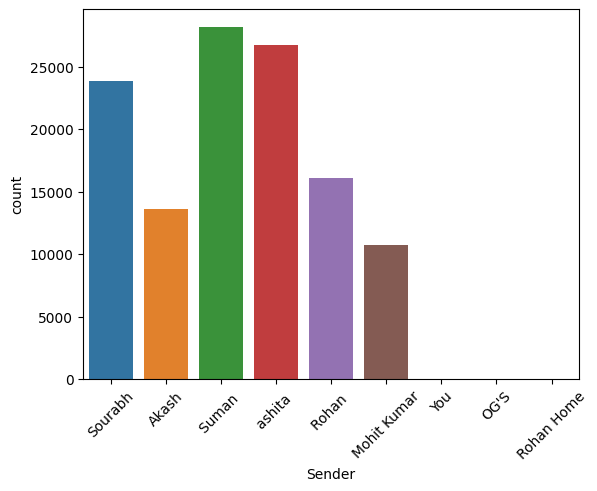

In [45]:
sns.countplot(df,x='Sender',hue='Sender',stat='count')
plt.xticks(rotation=45)

In [46]:
X=df['Sender'].value_counts().head()


<Axes: xlabel='Sender', ylabel='count'>

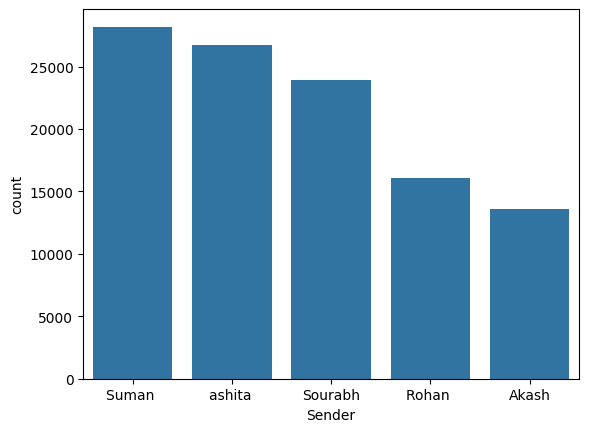

In [47]:
sns.barplot(X)

In [48]:
round((df['Sender'].value_counts()/df.shape[0])*100,2).reset_index()

Sender  count
0       Suman   23.62
1      ashita   22.40
2      Sourabh  20.03
3       Rohan   13.48
4        Akash  11.41
5  Mohit Kumar   9.02
6   Rohan Home   0.03
7         OG'S   0.01
8         ‎You   0.00

In [49]:
from wordcloud import WordCloud

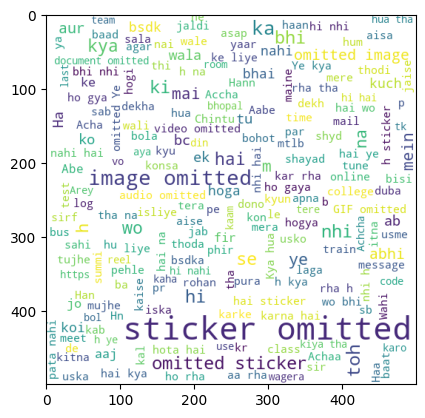

In [50]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
df_sw=wc.generate(df['Message'].str.cat(sep=" "))
plt.imshow(df_sw)

In [68]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()
stop_words

".\n..\n...\n?\n-\n--\n1\n2\n3\n4\n5\n6\n7\n8\n9\n0\na\naadi\naaj\naap\naapne\naata\naati\naaya\naaye\nab\nabbe\nabbey\nabe\nabhi\nable\nabout\nabove\naccha\naccording\naccordingly\nacha\nachcha\nacross\nactually\nafter\nafterwards\nagain\nagainst\nagar\nain\naint\nain't\naisa\naise\naisi\nalag\nall\nallow\nallows\nalmost\nalone\nalong\nalready\nalso\nalthough\nalways\nam\namong\namongst\nan\nand\nandar\nanother\nany\nanybody\nanyhow\nanyone\nanything\nanyway\nanyways\nanywhere\nap\napan\napart\napna\napnaa\napne\napni\nappear\nare\naren\narent\naren't\naround\narre\nas\naside\nask\nasking\nat\naur\navum\naya\naye\nbaad\nbaar\nbad\nbahut\nbana\nbanae\nbanai\nbanao\nbanaya\nbanaye\nbanayi\nbanda\nbande\nbandi\nbane\nbani\nbas\nbata\nbatao\nbc\nbe\nbecame\nbecause\nbecome\nbecomes\nbecoming\nbeen\nbefore\nbeforehand\nbehind\nbeing\nbelow\nbeside\nbesides\nbest\nbetter\nbetween\nbeyond\nbhai\nbheetar\nbhi\nbhitar\nbht\nbilkul\nbohot\nbol\nbola\nbole\nboli\nbolo\nbolta\nbolte\nbolti\nboth\

In [78]:
words=[]
for message in df['Message']:
    for word in message.lower():
        if word not in stop_words:
            words.extend(word)

In [79]:
words


['\u200e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\u200e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '🤧',
 '\u200e',
 ' ',
 ' ',
 ' ',
 '\u200e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\u200e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\u200e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\u200e',
 ' ',
 ' ',
 ' ',
 '🥲',
 ' ',
 ' ',
 ' ',
 '\u200e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\u200e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\u200e',
 ' ',
 ' ',
 ' ',
 '\u200e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '🥲',
 '\u200e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '🥲',
 '🤦',
 '🏻',
 '\u200d',
 '♂',
 '️',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '🤦',
 '🏻',
 '\u200d',
 '♂',
 '️',
 ' ',
 ' ',
 ' ',
 ' ',
 '🥲',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '😅',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 ' ',
 ' ',
 ' ',


In [84]:
from collections import Counter
most_common=pd.DataFrame(Counter(words).most_common(20))

<BarContainer object of 20 artists>

d:\python\ML\whatsapp analysis\myenv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\python\ML\whatsapp analysis\myenv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\python\ML\whatsapp analysis\myenv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129400 (\N{DISGUISED FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\python\ML\whatsapp analysis\myenv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127773 (\N{FULL MOON WITH FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\python\ML\whatsapp analysis\myenv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127770 (\N{NEW MOON WITH FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\python\ML\whatsapp analysis\my

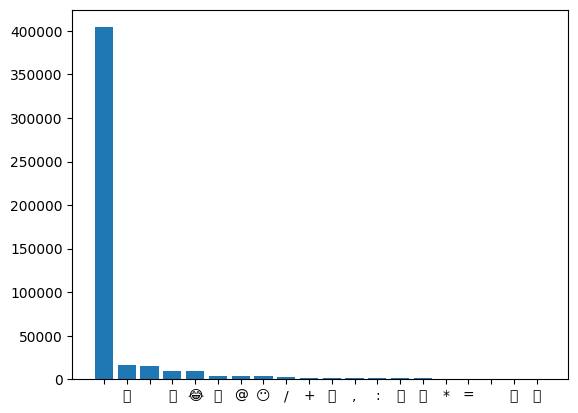

In [89]:
plt.bar(most_common[0],most_common[1])